In [15]:
pip install seaborn

2892.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Searching Data Scientist on Naukri. Scraping data using selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import os
import time

class NaukriScrper:
  def __init__(self) -> None:
    self.base_url = "https://naukri.com"
    self.service = Service(executable_path="./chromedriver")
    options = Options()
    self.driver = webdriver.Chrome(service=self.service, options=options)

  def buildUrl(self, path, query_params={}):
    """ Constructs the URL with optional query parameters """
    url = self.base_url + path
    if query_params:
        query_string = "&".join([f"{key}={value}" for key, value in query_params.items()])
        url += "?" + query_string
    return url
  
  def fetch(self, path, query_params={}):
      """Makes the HTTP request and returns the content."""
      url = self.buildUrl(path, query_params)
      page_source = None
      try:
          self.driver.get(url)
          time.sleep(5)
          page_source = self.driver.page_source
      finally:
          print("Fetching completed")
      return page_source
  
  def extract_job_info(self):
    soup = BeautifulSoup(self.driver.page_source, features="html.parser")
    
    elements = soup.find_all(class_='srp-jobtuple-wrapper')
    jobs = [] 
    for job_element in elements:
      job_info = {}

      job_info['id'] = job_element['data-job-id']

       # Extracting job title from row1
      title_tag = job_element.find('a', class_='title')
      job_info['job_title'] = title_tag.get_text(strip=True) if title_tag else None

      # Extracting company name, rating, and review from row2
      row2 = job_element.find('div', class_='row2')
      if row2:
        company_name_tag = row2.find('a', class_='comp-name')
        job_info['company_name'] = company_name_tag.get_text(strip=True) if company_name_tag else None

        rating_tag = row2.find('a', class_='rating')
        job_info['rating'] = rating_tag.get_text(strip=True) if rating_tag else None

        review_tag = row2.find('a', class_='review')
        job_info['review'] = review_tag.get_text(strip=True) if review_tag else None

      # Extracting experience, salary, and location from row3
      row3 = job_element.find('div', class_='row3')
      if row3:
        job_info['experience_needed'] = row3.find('span', class_='exp-wrap').get_text(strip=True)
        job_info['salary_range'] = row3.find('span', class_='sal-wrap').get_text(strip=True)
        job_info['location'] = row3.find('span', class_='loc-wrap').get_text(strip=True)
      
      # Extracting skills from row5
      row5 = job_element.find('div', class_='row5')
      if row5:
        skills_list = row5.find('ul')
        if skills_list:
          job_info['skills'] = [li.get_text(strip=True) for li in skills_list.find_all('li')]

      jobs.append(job_info)
    
    return jobs
  
  def exit_driver(self):
    self.driver.quit()


jobs = []

file_path = 'naukri_jobs.csv'

for page in range(21,45):
   scraper = NaukriScrper()
   path = "/data-scientist-jobs-{page}".format(page=page)
   scraper.fetch(path)
   page_jobs = scraper.extract_job_info()
   jobs.extend(page_jobs)
   scraper.exit_driver()

jobs_df = pd.DataFrame(jobs)
file_exists = os.path.isfile(file_path)
jobs_df.to_csv(file_path, mode='a', header=not file_exists, index=False)



In [56]:
# analytics on scraped jobs data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'naukri_jobs.csv'

df = pd.read_csv(file_path)

def standardize_title(title):
  title = title.lower() # normalise case
  if "data" in title and "scientist" in title:
    if 'senior' in title or 'sr' in title or 'iii' in title:
      return 'Senior Data Scientist'
    elif 'lead' in title:
      return 'Lead Data Scientist'
    elif 'nlp' in title or 'ai/ml' in title:
      return 'Specialized Data Scientist'
    elif 'principal' in title:
      return 'Principal Data Scientist'
    elif 'staff' in title:
      return 'Staff Data Scientist'
    elif 'associate' in title or 'analyst' in title:
      return 'Junior Data Scientist'
    else:
      return 'Data Scientist'
  else:
    return "Other"
  


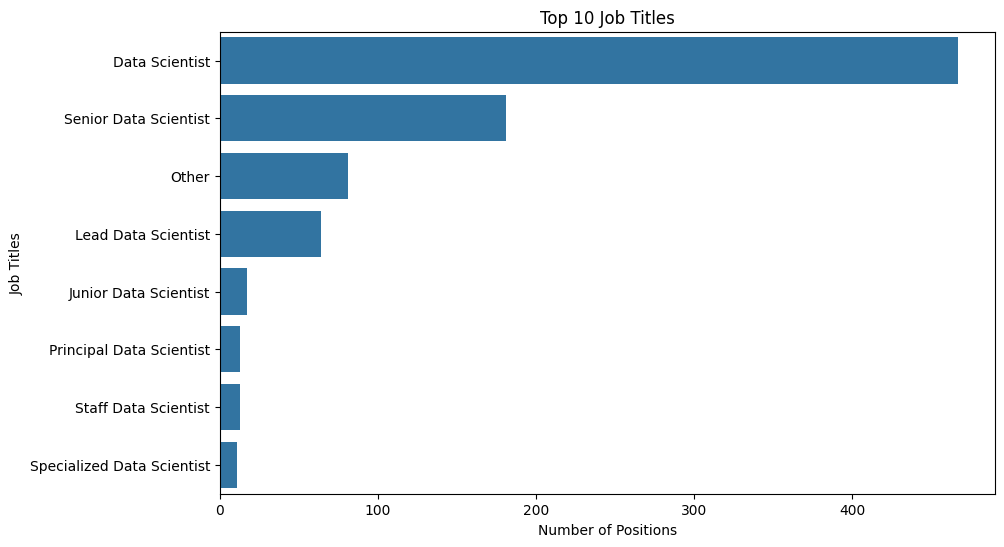

In [57]:
df['standardize_title'] = df['job_title'].apply(standardize_title)

plt.figure(figsize=(10, 6))
std_job_title_counts = df['standardize_title'].value_counts().head(10)  # Adjust as needed for your dataset size
sns.barplot(x=std_job_title_counts.values, y=std_job_title_counts.index)
plt.title('Top 10 Job Titles')
plt.xlabel('Number of Positions')
plt.ylabel('Job Titles')
plt.show()


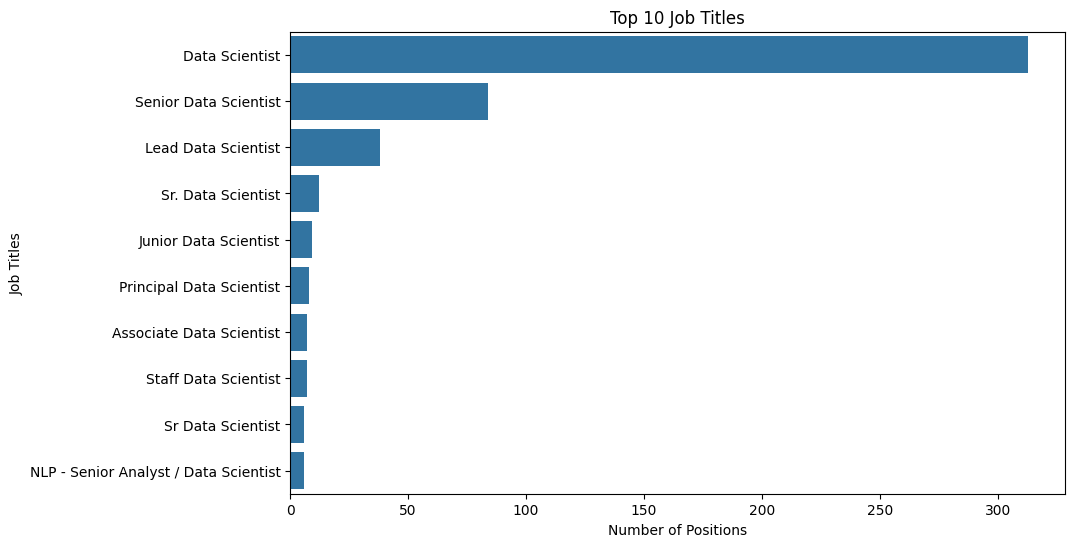

In [29]:
plt.figure(figsize=(10, 6))
job_title_counts = df['job_title'].value_counts().head(10)  # Adjust as needed for your dataset size
sns.barplot(x=job_title_counts.values, y=job_title_counts.index)
plt.title('Top 10 Job Titles')
plt.xlabel('Number of Positions')
plt.ylabel('Job Titles')
plt.show()

/var/folders/n8/r6_kjvss0hq6xpg6frkjsxk80000gn/T/ipykernel_82273/864210661.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['min_exp', 'max_exp']] = filtered_df['experience_needed'].str.split('-', expand=True)
/var/folders/n8/r6_kjvss0hq6xpg6frkjsxk80000gn/T/ipykernel_82273/864210661.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['min_exp', 'max_exp']] = filtered_df['experience_needed'].str.split('-', expand=True)
/var/folders/n8/r6_kjvss0hq6xpg6frkjsxk80000gn/T/ipykernel_8

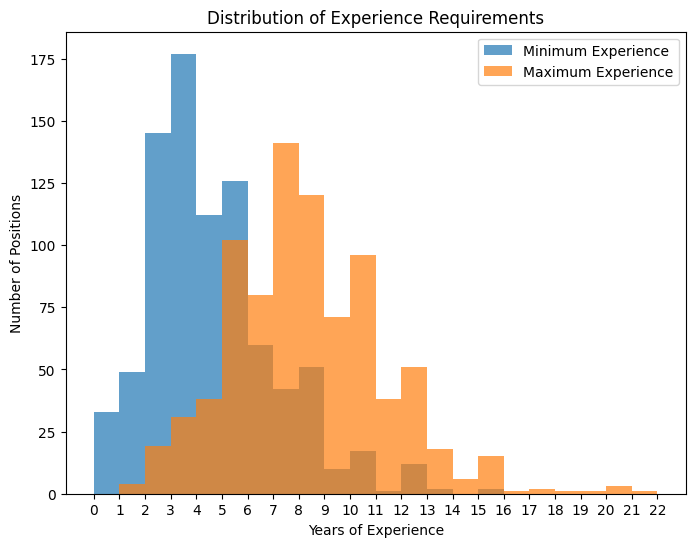

In [38]:
# Experience needed analysis
pattern = r'^\d+-\d+ Yrs$'
filtered_df = df[df['experience_needed'].str.match(pattern)]

# Split the 'experience_needed' column into two new columns 'min_exp' and 'max_exp'
filtered_df[['min_exp', 'max_exp']] = filtered_df['experience_needed'].str.split('-', expand=True)

# Remove the ' Yrs' part and convert the result to numeric
filtered_df['min_exp'] = filtered_df['min_exp'].str.strip().astype(int)
filtered_df['max_exp'] = filtered_df['max_exp'].str.replace(' Yrs', '').str.strip().astype(int)

# Histogram for minimum experience
plt.figure(figsize=(8, 6))
max_exp = filtered_df['max_exp'].max()
plt.hist(filtered_df['min_exp'], bins=range(0, max_exp + 1), alpha=0.7, label='Minimum Experience')
plt.hist(filtered_df['max_exp'], bins=range(0, max_exp + 1), alpha=0.7, label='Maximum Experience')

plt.xlabel('Years of Experience')
plt.ylabel('Number of Positions')
plt.title('Distribution of Experience Requirements')

plt.xticks(range(0, max_exp + 1))

plt.legend()
plt.show()

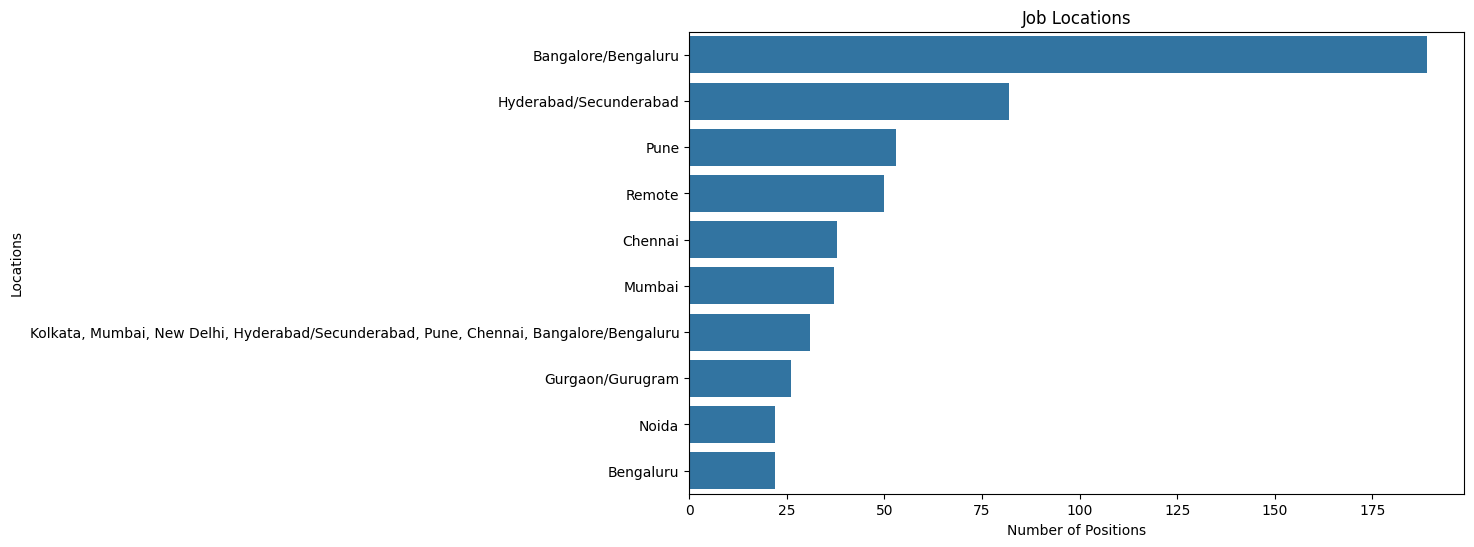

In [41]:
# Visualization for Locations
plt.figure(figsize=(10, 6))
location_counts = df['location'].value_counts().head(10)  # Adjust as needed
sns.barplot(x=location_counts.values, y=location_counts.index)
plt.title('Job Locations')
plt.xlabel('Number of Positions')
plt.ylabel('Locations')
plt.show()

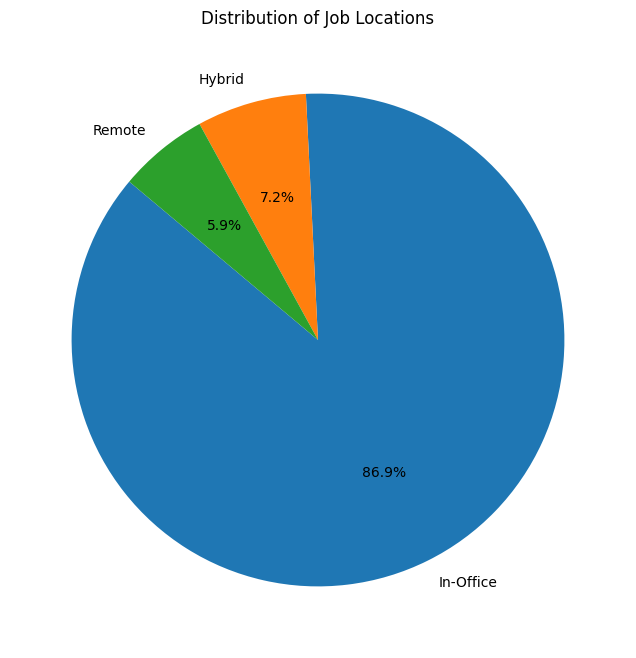

In [43]:
def categorize_location(location):
  location = location.lower()
  if 'remote' in location:
      return 'Remote'
  elif 'hybrid' in location:
      return 'Hybrid'
  else:
      return 'In-Office'

df['location_category'] = df['location'].apply(categorize_location)

location_counts = df['location_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Locations')
plt.show()

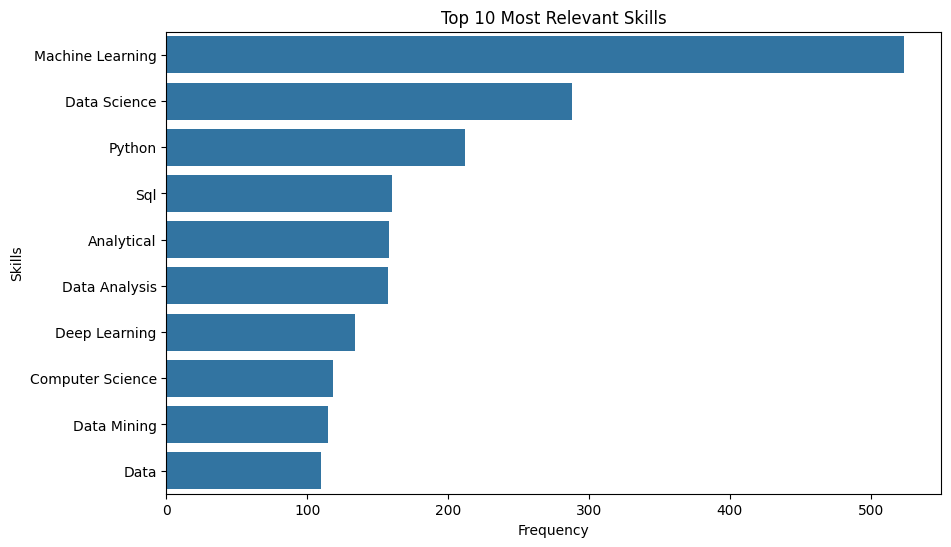

In [58]:
import ast

df['skills'] = df['skills'].fillna('[]')

# df['skills'] = df['skills'].apply(ast.literal_eval)
df['skills'] = df['skills'].apply(lambda x: [skill.title() for skill in ast.literal_eval(x)] if isinstance(x, str) else [])

all_skills = df['skills'].explode()
skills_counts = all_skills.value_counts()

skills_df = skills_counts.reset_index() # Converts the Series into a DataFrame
skills_df.columns = ['Skill', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Skill', data=skills_df.head(10))  # Adjust the head() value for more or fewer skills
plt.title('Top 10 Most Relevant Skills')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.show()

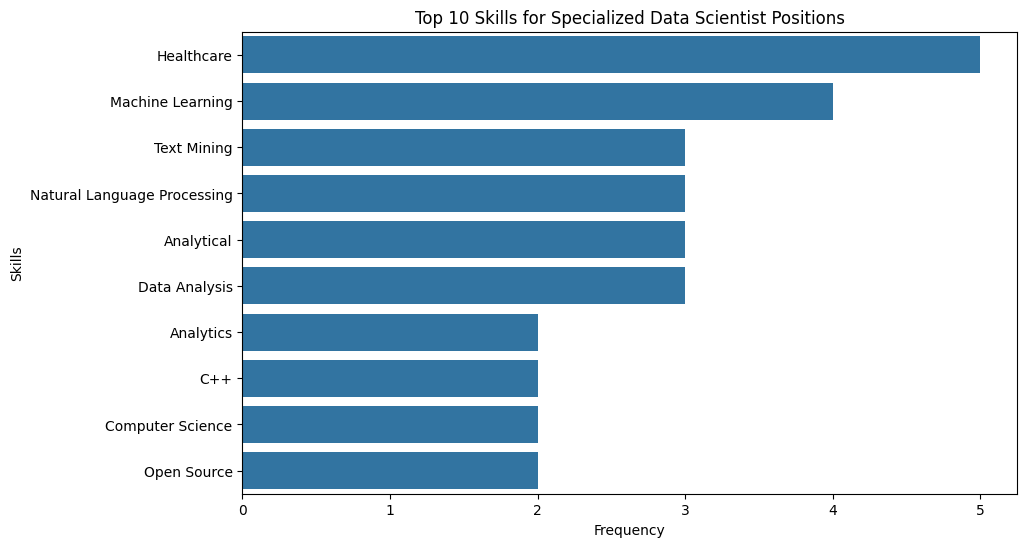

In [60]:
specialized_ds_jobs = df[df['standardize_title'] == 'Specialized Data Scientist']
specialized_skills = specialized_ds_jobs['skills'].explode()

specialized_skills_counts = specialized_skills.value_counts()
specialized_skills_df = specialized_skills_counts.reset_index()
specialized_skills_df.columns = ['Skill', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Skill', data=specialized_skills_df.head(10))
plt.title('Top 10 Skills for Specialized Data Scientist Positions')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.show()